In [142]:
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("../../")

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import anndata
from scipy.stats import spearmanr, pearsonr
import numpy as np
from PIL import Image
import matplotlib

from digitalhistopathology.benchmark.benchmark_clustering import BenchmarkClustering

# Load configuration
with open("../../config/config_notebooks_Ovarian.json", "r") as config_file:
    config = json.load(config_file)

Image.MAX_IMAGE_PIXELS = None
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42

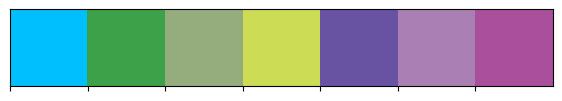

In [143]:
a = config["retrained_color_palette"]
sns.palplot(sns.color_palette(a))

In [144]:
extension='pdf'



In [145]:
# This will give you the results for the FULL models.

model_type = config["retrained_model_list2_type"]
model_list = config["retrained_model_list2"]
benchmark_folder = config["retrained_benchmark_folder2"]
path_to_pipeline=config['path_to_retrained_pipelines_2']


# UNCOMMENT TO GENERATE THE RESULTS FOR THE EXPLORA MODELS
# model_type = config["retrained_model_list1_type"]
# model_list = config["retrained_model_list1"]
# benchmark_folder = config["retrained_benchmark_folder1"]
# path_to_pipeline=config['path_to_retrained_pipelines_1']


pairs_to_compare = [("uni", model) for model in model_list if model != "uni"]

models_palette = dict(zip(model_list, a))
models_palette["handcrafted_features"] = "lightgrey"


In [146]:

saving_folder=os.path.join(benchmark_folder, "unsupervised_clustering_ARI", "kmeans")

benchmark_clustering = BenchmarkClustering(path_to_pipeline=path_to_pipeline,
                                           pipelines_list=model_list,
                                           results_folder="../../results",
                                           saving_folder=saving_folder,
                                           dataset=config['dataset'],
                                           extension=extension
                                           )

['uni', 'uni_full_kde_4096_prototypes', 'uni_full_kde_16384_prototypes', 'uni_full_kde_65536_prototypes', 'uni_full_koleo_4096_prototypes', 'uni_full_koleo_16384_prototypes', 'uni_full_koleo_65536_prototypes']
<class 'list'>
Label files: []


In [147]:
def plot_ari_scores_all_patients(clustering_dict, model_list=None):

    if model_list is None:
        model_list = clustering_dict.keys()

    ari_scores = {}
    for model in model_list:
        ari_scores[model] = {}
        for patient in clustering_dict[model].keys():
            if (patient != 'all') and (patient != 'mean'):
                ari_scores[model][patient] = clustering_dict[model][patient]['ari']
    df_aris = pd.DataFrame.from_dict(ari_scores)
    df_aris_melted = pd.melt(df_aris, var_name='model', value_name='ari')
    df_aris_melted['patient'] = df_aris.index.to_list()*len(df_aris.columns)

    sns.boxplot(data=df_aris_melted, x='model', y='ari', color='white', linewidth=2)
    sns.stripplot(data=df_aris_melted, x='model', y='ari', jitter=True, dodge=True, linewidth=1, hue='patient', palette='Accent')
    plt.xticks(rotation=90)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    sns.despine()
    plt.title('ARI scores for unsupervised clustering', weight='bold')

## Comparison between linear and unlinear clustering

In [148]:

raw_clust = benchmark_clustering.unsupervised_clustering_benchmark(n_clusters=None, clustering_name='raw')


svd_clust = benchmark_clustering.unsupervised_clustering_benchmark(n_clusters=None, clustering_name='svd5')
    

umap_clust = benchmark_clustering.get_best_UMAP_ari_per_slide(force_loading=True)


Loading unsupervised clustering results for model uni...
Loading unsupervised clustering results for model uni_full_kde_4096_prototypes...
Loading unsupervised clustering results for model uni_full_kde_16384_prototypes...
Loading unsupervised clustering results for model uni_full_kde_65536_prototypes...
Loading unsupervised clustering results for model uni_full_kde_4096_prototypes...
Loading unsupervised clustering results for model uni_full_kde_16384_prototypes...
Loading unsupervised clustering results for model uni_full_kde_65536_prototypes...
Loading unsupervised clustering results for model uni_full_koleo_4096_prototypes...
Loading unsupervised clustering results for model uni_full_koleo_16384_prototypes...
Loading unsupervised clustering results for model uni_full_koleo_65536_prototypes...
Loading unsupervised clustering results for model uni...
Loading unsupervised clustering results for model uni_full_kde_4096_prototypes...
Loading unsupervised clustering results for model uni_

In [149]:
for model in raw_clust.keys():
    print(f"Model: {model}: ari all: {raw_clust[model]['all']['ari']}, ari mean: {raw_clust[model]['mean']['ari']}")

Model: uni: ari all: 0.17580008311037237, ari mean: 0.19056592546548368
Model: uni_full_kde_4096_prototypes: ari all: 0.114181846365749, ari mean: 0.0992224488109146
Model: uni_full_kde_16384_prototypes: ari all: 0.0874356562735786, ari mean: 0.07274232493293845
Model: uni_full_kde_65536_prototypes: ari all: 0.0897299388552439, ari mean: 0.0822594151256785
Model: uni_full_koleo_4096_prototypes: ari all: 0.11862596912278842, ari mean: 0.10749557866898425
Model: uni_full_koleo_16384_prototypes: ari all: 0.12526712005166835, ari mean: 0.18863066866933462
Model: uni_full_koleo_65536_prototypes: ari all: 0.13116712990569082, ari mean: 0.12566029419388225


In [150]:
for model in raw_clust.keys():
    print(f"Model: {model}: ari tumor: {raw_clust[model]['ARI_tumor']}")

Model: uni: ari tumor: 0.17282401568224678
Model: uni_full_kde_4096_prototypes: ari tumor: 0.15476189955299993
Model: uni_full_kde_16384_prototypes: ari tumor: 0.1569768512763157
Model: uni_full_kde_65536_prototypes: ari tumor: 0.14204172075106955
Model: uni_full_koleo_4096_prototypes: ari tumor: 0.1596024334911431
Model: uni_full_koleo_16384_prototypes: ari tumor: 0.18428231050955662
Model: uni_full_koleo_65536_prototypes: ari tumor: 0.14794968481092843


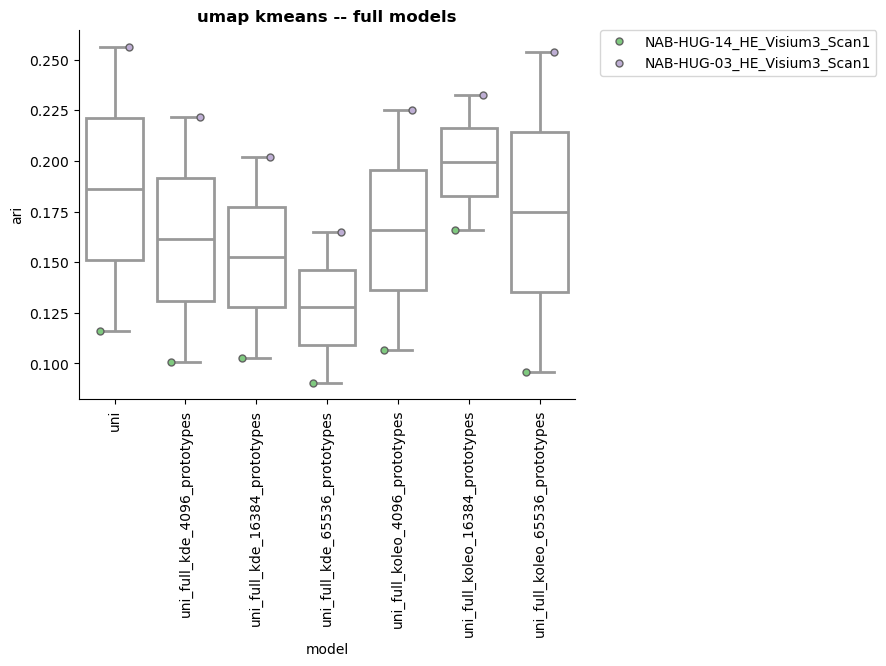

In [151]:
# for clust_dict, clust_name in zip([raw_clust, svd_clust, umap_clust], ["raw", "svd", "umap"]):

plt.figure()
plot_ari_scores_all_patients(umap_clust, model_list=model_list)
plt.title(f"umap kmeans -- {model_type} models", weight='bold')

if len(umap_clust[model_list[0]].keys()) > 15:
    plt.legend().remove()

plt.savefig(os.path.join(config['figures_folder'], f"Figure3/umap_kmeans_all_patients_{model_type}_models.{extension}"), bbox_inches='tight', dpi=300)



In [152]:
# Scatter plot

In [153]:
dfs_clust = []
for clustering_dict, method in zip([raw_clust, svd_clust, umap_clust], ["raw", "svd", "umap"]):
#for clustering_dict, method in zip([umap_clust], ["umap"]):
    ari_scores = {}
    for model in clustering_dict.keys():
        ari_scores[model] = {}
        for patient in clustering_dict[model].keys():
            #if (patient != 'all') and (patient != 'mean'):
            if (patient != 'ARI_tumor'):
                ari_scores[model][patient] = clustering_dict[model][patient]['ari']
    df_aris = pd.DataFrame.from_dict(ari_scores)
    df_aris_melted = pd.melt(df_aris, var_name='model', value_name='ari')
    df_aris_melted['patient'] = df_aris.index.to_list()*len(df_aris.columns)
    df_aris_melted['clustering'] = method
    dfs_clust.append(df_aris_melted)

df_comp = pd.concat(dfs_clust)




No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

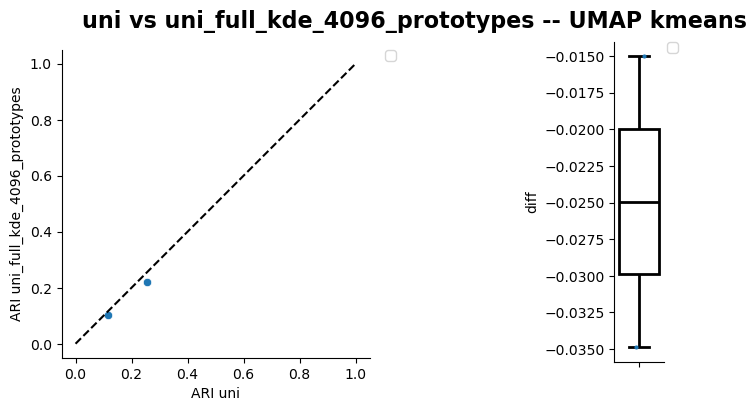

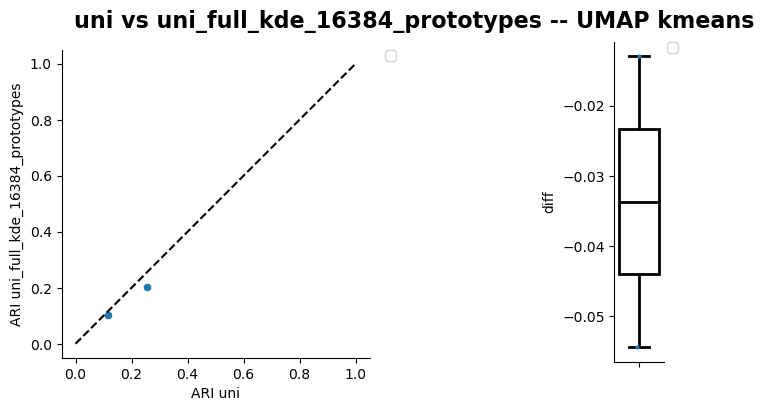

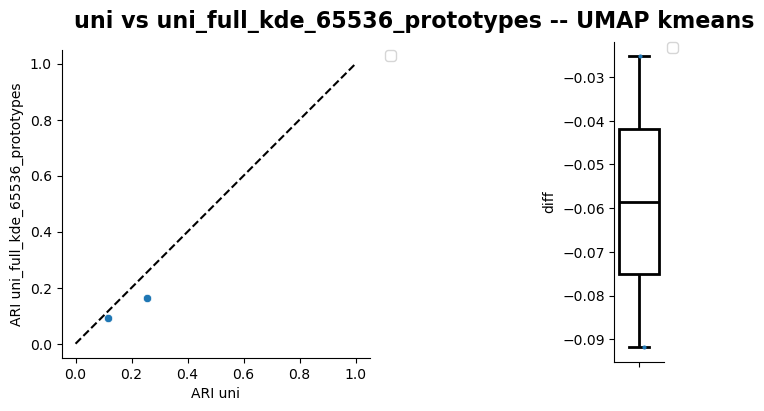

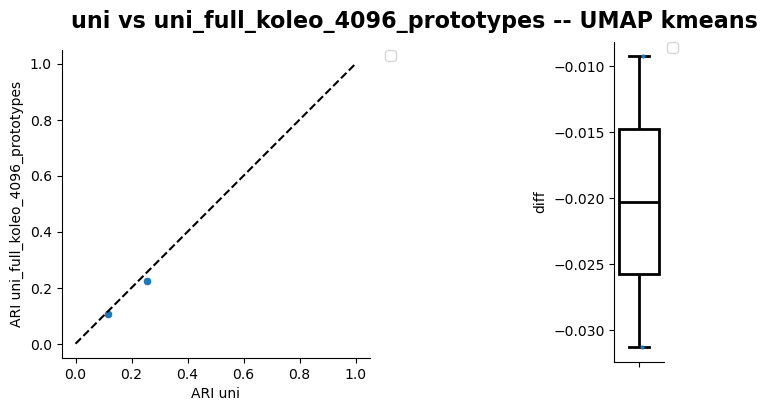

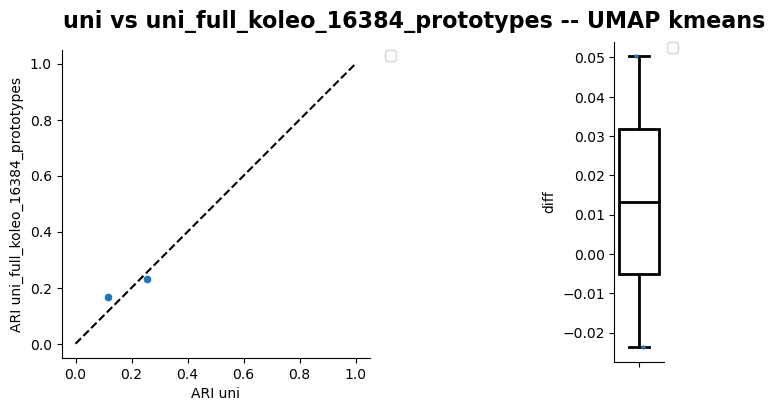

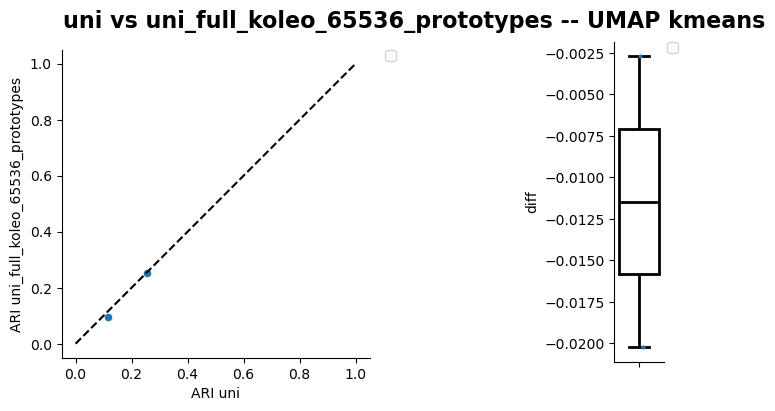

In [154]:
df_comps = {}
for clust_type in ['umap']:
  df_comps[clust_type] = {}
  for pair in pairs_to_compare:
    
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)

    df_sub_comp = df_comp[(df_comp['model'] == pair[1]) 
                            & (df_comp['clustering'] == clust_type) 
                            & (df_comp['patient'] != 'mean') 
                            & (df_comp['patient'] != 'all')].merge(df_comp[(df_comp['model'] == pair[0]) 
                                                                        & (df_comp['clustering'] == clust_type) 
                                                                        & (df_comp['patient'] != 'mean') 
                                                                        & (df_comp['patient'] != 'all')], 
                                                                        left_on='patient',
                                                                            right_on='patient', 
                                                                            suffixes=(f'_{pair[1]}', f'_{pair[0]}'))
    
    df_comps[clust_type][f"{pair[1]}"] = df_sub_comp
    
    plt.gca().set_aspect('equal', adjustable='box')
    sns.scatterplot(data=df_sub_comp, x=f'ari_{pair[0]}', y=f'ari_{pair[1]}')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--')
    if len(df_sub_comp['patient'].unique()) > 15:
      plt.legend().remove()
    else:
      plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # plt.title(f'{pair[0]} vs {pair[1]}', weight='bold')
    plt.xlabel(f'ARI {pair[0]}')
    plt.ylabel(f'ARI {pair[1]}')
    sns.despine()

    df_sub_comp['diff'] = df_sub_comp[f'ari_{pair[1]}'] - df_sub_comp[f'ari_{pair[0]}']

    # plt.title(f'Difference in ARI {pair[1]} - {pair[0]}', weight='bold')

    plt.subplot(1, 2, 2)
    plt.gca().set_position([0.7, 0.1, 0.05, 0.8])
    sns.boxplot(data=df_sub_comp, y='diff', color='white', linewidth=2,  boxprops=dict(facecolor='white', edgecolor='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            medianprops=dict(color='black'))
    sns.stripplot(data=df_sub_comp, y='diff', linewidth=0, size=3)
    
    if len(df_sub_comp['patient'].unique()) > 15:
      plt.legend().remove()
    else:
      plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    sns.despine()

    plt.suptitle(f'{pair[0]} vs {pair[1]} -- {clust_type.upper()} kmeans', weight='bold', fontsize=16)
    plt.savefig(os.path.join(config["figures_folder"], f"Figure3/{pair[0]}_vs_{pair[1]}_{clust_type}_kmeans.pdf"), bbox_inches='tight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

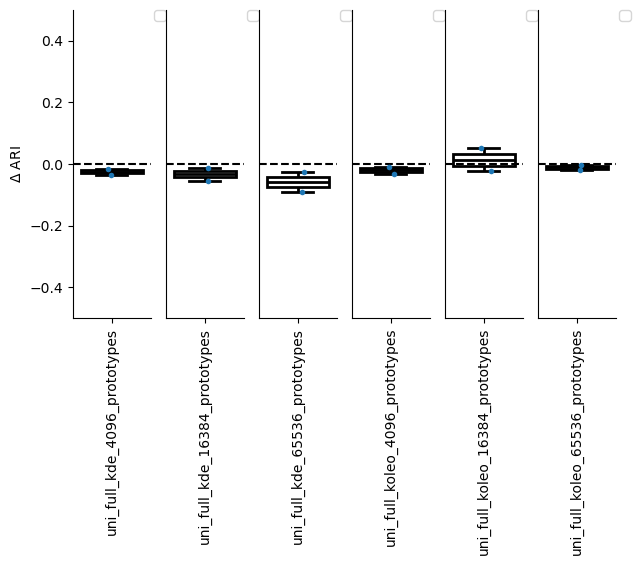

In [155]:
plt.figure(figsize=(7, 4))

df_comps = {}
for clust_type in ['umap']:
  df_comps[clust_type] = {}
  for i, pair in enumerate(pairs_to_compare):
    
    plt.subplot(1, len(pairs_to_compare), i+1)

    df_sub_comp = df_comp[(df_comp['model'] == pair[1]) 
                            & (df_comp['clustering'] == clust_type) 
                            & (df_comp['patient'] != 'mean') 
                            & (df_comp['patient'] != 'all')].merge(df_comp[(df_comp['model'] == pair[0]) 
                                                                        & (df_comp['clustering'] == clust_type) 
                                                                        & (df_comp['patient'] != 'mean') 
                                                                        & (df_comp['patient'] != 'all')], 
                                                                        left_on='patient',
                                                                            right_on='patient', 
                                                                            suffixes=(f'_{pair[1]}', f'_{pair[0]}'))
    
    df_comps[clust_type][f"{pair[1]}"] = df_sub_comp
    


    df_sub_comp['diff'] = df_sub_comp[f'ari_{pair[1]}'] - df_sub_comp[f'ari_{pair[0]}']

    #plt.gca().set_position([0.7, 0.1, 0.05, 0.8])
    sns.boxplot(data=df_sub_comp, y='diff', color='white', linewidth=2,  boxprops=dict(facecolor='white', edgecolor='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            medianprops=dict(color='black'))
    sns.stripplot(data=df_sub_comp, y='diff', linewidth=0, size=4)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    sns.despine()
    plt.xticks(ticks=[0], labels=[pair[1]], rotation=90)
    plt.ylim(-0.5, 0.5)
    
    plt.axhline(0, color='black', linestyle='--')
    plt.ylabel(r'$\Delta$ ARI')
    if i != 0:

        plt.gca().axes.get_yaxis().set_visible(False)
    
    if i != len(pairs_to_compare) -1:
        plt.legend().remove()
        
    if len(df_sub_comp['patient'].unique()) > 15:
      plt.legend().remove()
    else:
      plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        

plt.savefig(os.path.join(config["figures_folder"], f"Figure3/boxplot_ARI_differences_per_patient_{clust_type}_kmeans_{model_type}_models.pdf"), bbox_inches='tight')


In [156]:
df_comp_patient = df_comp[~(df_comp["patient"].isin(["mean", "all"]))]


In [157]:
df_comp[df_comp['clustering'] == 'raw'][['model', 'ari']].groupby('model').mean()

,ari
model,
uni,0.186874
uni_full_kde_16384_prototypes,0.076416
uni_full_kde_4096_prototypes,0.102962
uni_full_kde_65536_prototypes,0.084127
uni_full_koleo_16384_prototypes,0.172790
uni_full_koleo_4096_prototypes,0.110278
uni_full_koleo_65536_prototypes,0.127037


In [158]:
df_comp[df_comp['clustering'] == 'raw'][['model', 'ari']].groupby('model').std()

,ari
model,
uni,0.053889
uni_full_kde_16384_prototypes,0.021846
uni_full_kde_4096_prototypes,0.049546
uni_full_kde_65536_prototypes,0.041054
uni_full_koleo_16384_prototypes,0.045849
uni_full_koleo_4096_prototypes,0.009828
uni_full_koleo_65536_prototypes,0.057799


In [159]:

for value in df_comp[df_comp['clustering'] == 'umap'][['model', 'ari']].groupby('model').std().loc[model_list, 'ari']:
    print(f"{value:.2f}")


0.10
0.09
0.07
0.05
0.08
0.05
0.11


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


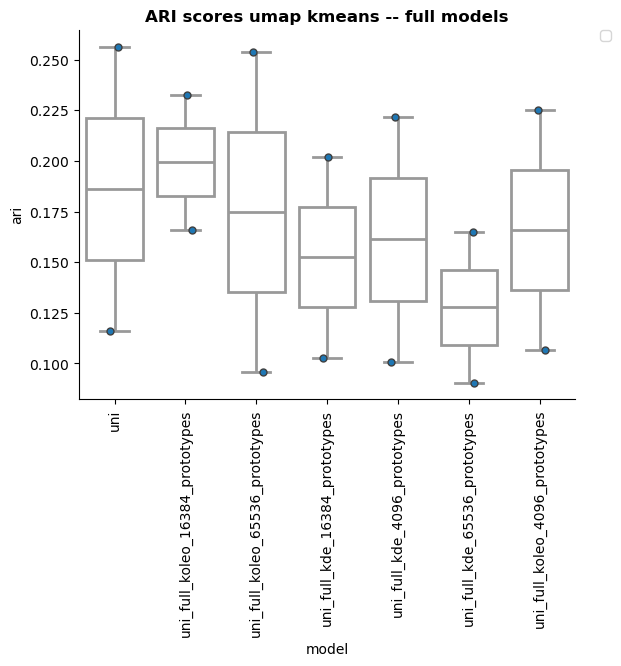

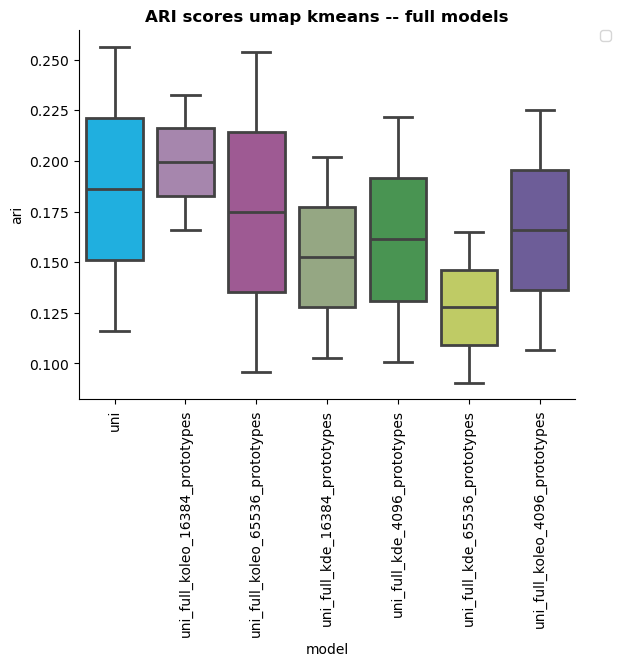

In [160]:
## 
sns.boxplot(data=df_comp_patient[df_comp_patient['clustering'] == 'umap'], x='model', y='ari', color='white', linewidth=2)
sns.stripplot(data=df_comp_patient[df_comp_patient['clustering'] == 'umap'], x='model', y='ari', jitter=True, dodge=True, linewidth=1)
plt.xticks(rotation=90)
sns.despine()
plt.title('ARI scores for unsupervised clustering', weight='bold')
sns.despine()
plt.title(f"ARI scores umap kmeans -- {model_type} models", weight='bold')

if len(df_comp_patient['patient'].unique()) > 15:
    plt.legend().remove()
else:
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(os.path.join(config["figures_folder"], f"Figure3/ari_scores_umap_kmeans_{model_type}_models_with_patient.pdf"), bbox_inches='tight')

## 
plt.figure()
sns.boxplot(data=df_comp_patient[df_comp_patient['clustering'] == 'umap'], 
            x='model', y='ari', hue='model', linewidth=2, palette=models_palette)
plt.xticks(rotation=90)
sns.despine()
plt.title('ARI scores for unsupervised clustering', weight='bold')
sns.despine()
plt.title(f"ARI scores umap kmeans -- {model_type} models", weight='bold')


if len(df_comp_patient['patient'].unique()) > 15:
    plt.legend().remove()
else:
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(os.path.join(config["figures_folder"], f"Figure3/ari_scores_umap_kmeans_{model_type}_models_colors.pdf"), bbox_inches='tight')

In [161]:

for i, model in enumerate(df_comp['model'].unique()):
    print(model)
    sub_df = df_comp[(df_comp['model'] == model) & (df_comp['clustering'] == 'umap')][['ari', 'patient']].rename(columns = {'ari': model})
    # dfs.append(sub_df)
    if i > 0:
        df = df.merge(sub_df, on='patient')
    else:
        df = sub_df.copy()

df.set_index('patient', inplace=True)
df_delta_ari = df.apply(lambda x: x - df['uni'])
df_delta_ari.drop('uni', axis=1, inplace=True) 

uni
uni_full_kde_4096_prototypes
uni_full_kde_16384_prototypes
uni_full_kde_65536_prototypes
uni_full_koleo_4096_prototypes
uni_full_koleo_16384_prototypes
uni_full_koleo_65536_prototypes


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(-0.1, 0.1)

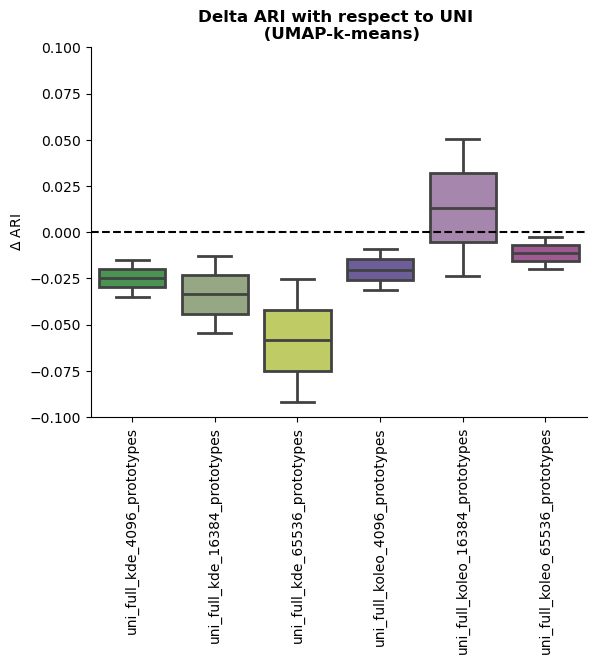

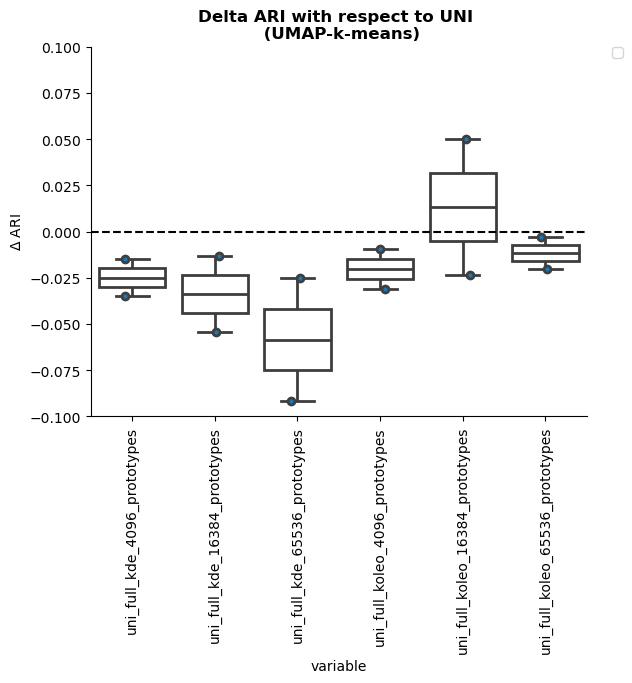

In [162]:
# plot delta ARI
plt.figure()
sns.boxplot(data=df_delta_ari, palette=models_palette, linewidth=2, showfliers=False)
plt.title(f'Delta ARI with respect to UNI \n (UMAP-k-means)', weight='bold')
plt.ylabel(r'$\Delta$ ARI')
sns.despine()
plt.xticks(rotation=90)
plt.axhline(0, color='black', linestyle='--')
plt.savefig(os.path.join(config["figures_folder"], f"Figure3/delta_umap_ari_scores_boxplot_{model_type}_models_colors.pdf"), bbox_inches='tight')
plt.ylim(-0.1, 0.1)

plt.figure()
sns.boxplot(data=df_delta_ari, color='white', linewidth=2)

# sns.stripplot(data=df_delta_ari.reset_index(), palette='Accent', hue='index')
df_long = df_delta_ari.reset_index().melt(id_vars=['patient'], var_name='variable', value_name='value')

# Create the strip plot
sns.stripplot(data=df_long, x='variable', y='value', jitter=True, dodge=True, linewidth=2)
plt.title(f'Delta ARI with respect to UNI \n (UMAP-k-means)', weight='bold')
plt.ylabel(r'$\Delta$ ARI')
sns.despine()
plt.xticks(rotation=90)
plt.axhline(0, color='black', linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(os.path.join(config["figures_folder"], f"Figure3/delta_umap_ari_scores_boxplot_{model_type}_models_with_patient.pdf"), bbox_inches='tight')

if df_long['patient'].nunique() > 15:
    plt.legend().remove()
else:
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    
plt.ylim(-0.1, 0.1)

In [163]:
## Correlation with shannon entropy
import json 

with open(os.path.join(benchmark_folder, "shannon_entropy", "shannon_entropy_all_comps_raw.json")) as f:
    shannon_entropy = json.load(f)

In [164]:
os.path.join(benchmark_folder, "shannon_entropy", "shannon_entropy_all_comps_raw.json")

'../../results/Ovarian/benchmark/uni_full_models/shannon_entropy/shannon_entropy_all_comps_raw.json'

In [165]:
df_shannon = pd.DataFrame.from_dict(shannon_entropy, orient='index', columns=['shannon_entropy'])


In [166]:
df_shannon.rename(index={'handcrafted': 'handcrafted_features'}, inplace=True)

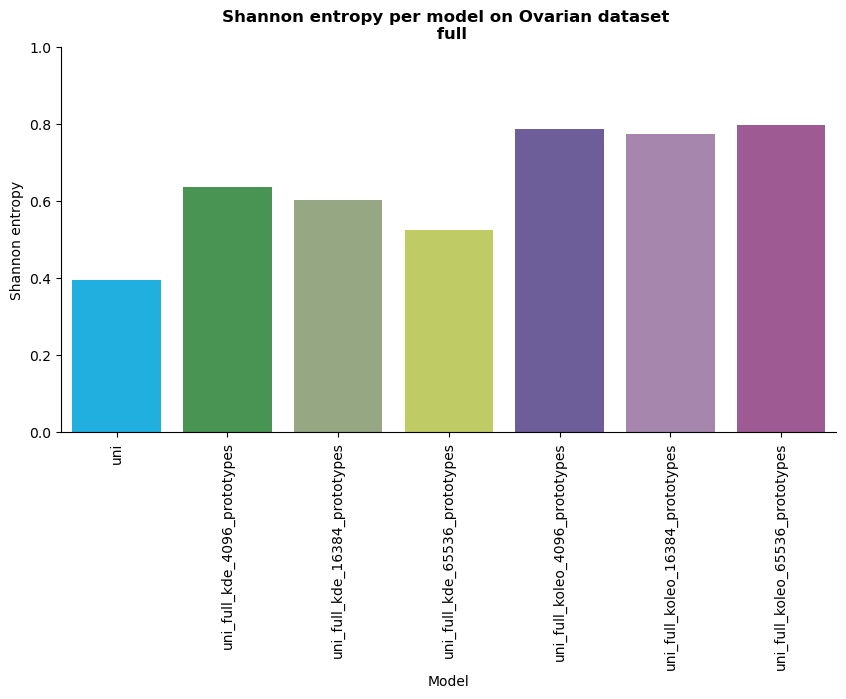

In [167]:
# df_shannon.sort_values('shannon_entropy', inplace=True, ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(data=df_shannon, 
            x=df_shannon.index, 
            y='shannon_entropy', 
            hue=df_shannon.index, palette=models_palette)
sns.despine()
plt.xlabel("Model")
plt.ylabel("Shannon entropy")
plt.title(f"Shannon entropy per model on {config['dataset']} dataset \n {model_type}", weight='bold')
plt.xticks(rotation=90)
plt.ylim(0,1)
plt.savefig(os.path.join(config["figures_folder"], f"Figure3/shannon_entropy_per_model_{model_type}.pdf"), bbox_inches='tight')

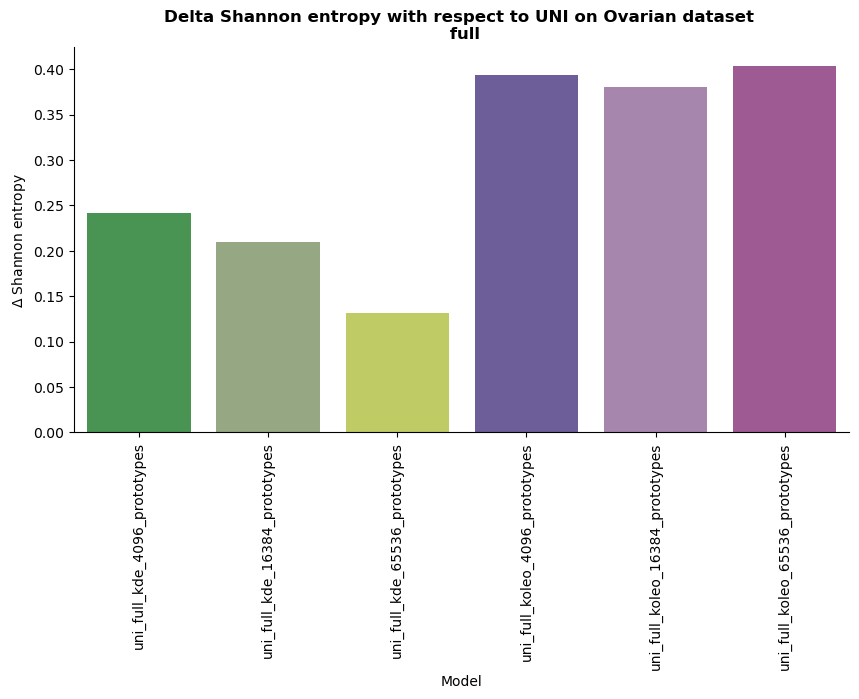

In [168]:
df_shannon_delta = df_shannon.copy()
df_shannon_delta = df_shannon_delta - df_shannon.loc['uni']
df_shannon_delta.drop('uni', inplace=True)

plt.figure(figsize=(10, 5))
sns.barplot(data=df_shannon_delta, 
            x=df_shannon_delta.index, 
            y='shannon_entropy', 
            hue=df_shannon_delta.index, palette=models_palette)
sns.despine()
plt.xlabel("Model")
plt.ylabel(r"$\Delta$ Shannon entropy")
plt.title(f"Delta Shannon entropy with respect to UNI on {config['dataset']} dataset \n {model_type}", weight='bold')
plt.xticks(rotation=90)
plt.savefig(os.path.join(config["figures_folder"], f"Figure3/delta_shannon_entropy_per_model_{model_type}_barplot.pdf"), bbox_inches='tight')





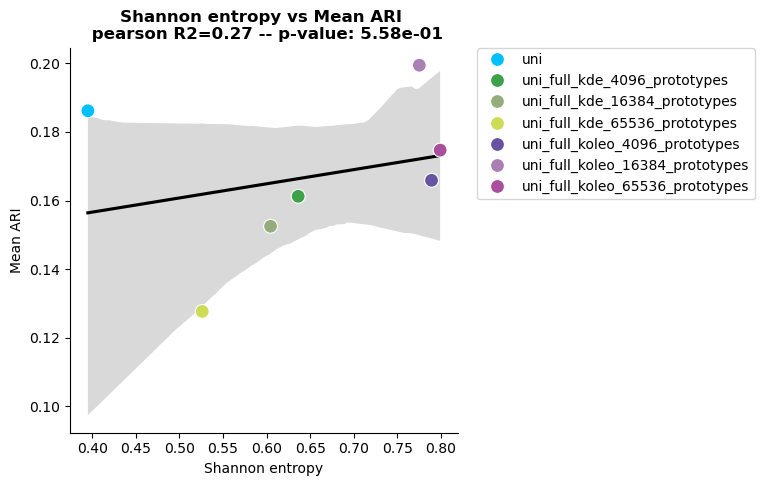

In [169]:

df_shannon = pd.DataFrame.from_dict(shannon_entropy, orient='index', columns=['shannon_entropy'])

mean_ari_per_model = df_comp[df_comp['clustering'] == 'umap'][['model', 'ari']].groupby('model').mean()
mean_ari_per_model.columns = ['mean_ari']

df_model_summary = df_shannon.merge(mean_ari_per_model, left_index=True, right_index=True)

# df_model_summary = df_model_summary.drop(["uni_full_4096_prototypes"])

s, p = pearsonr(df_model_summary['shannon_entropy'], df_model_summary['mean_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary, x='shannon_entropy', y='mean_ari', color='black')
sns.scatterplot(data=df_model_summary, x='shannon_entropy', y='mean_ari', hue=df_model_summary.index,
                palette=models_palette, zorder=2, s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('Mean ARI')
plt.title(f'Shannon entropy vs Mean ARI \n pearson R2={s:.2f} -- p-value: {p:.2e}', weight='bold')
sns.despine()
plt.savefig(os.path.join(config["figures_folder"], f"Figure3/shannon_entropy_vs_mean_ari_{model_type}_models.pdf"), bbox_inches='tight')

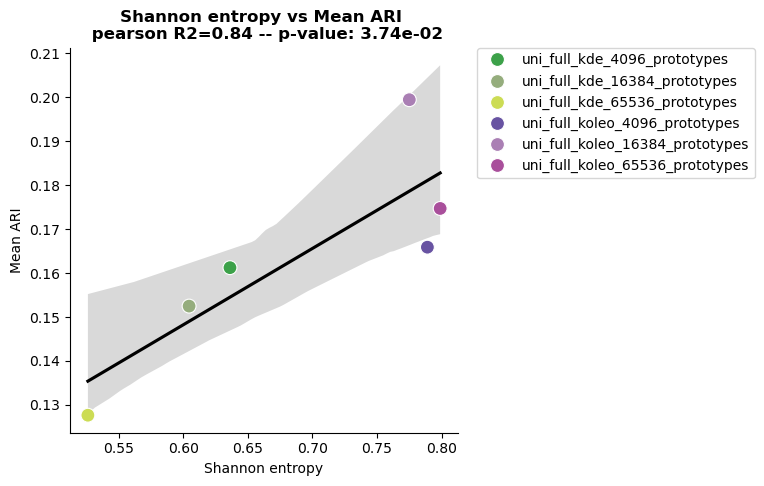

In [170]:


# df_model_summary = df_model_summary.drop(["uni_full_4096_prototypes"])

s, p = pearsonr(df_model_summary.drop("uni")['shannon_entropy'], df_model_summary.drop("uni")['mean_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary.drop("uni"), x='shannon_entropy', y='mean_ari', color='black')
sns.scatterplot(data=df_model_summary.drop("uni"), x='shannon_entropy', y='mean_ari', hue=df_model_summary.drop("uni").index,
                palette=models_palette, zorder=2, s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('Mean ARI')
plt.title(f'Shannon entropy vs Mean ARI \n pearson R2={s:.2f} -- p-value: {p:.2e}', weight='bold')
sns.despine()

In [171]:
overall_umap = benchmark_clustering.get_best_UMAP_ari_overall(annotated_only=False)

overall_umap_aris = {}
for model in overall_umap.keys():
    overall_umap_aris[model] = overall_umap[model]['ari']

df_model_summary['overall_ari'] = pd.Series(overall_umap_aris)

Computing best UMAP parameters for model uni...
Loading best UMAP parameters for model uni...
Computing best UMAP parameters for model uni_full_kde_4096_prototypes...
Loading best UMAP parameters for model uni_full_kde_4096_prototypes...
Loading best UMAP parameters for model uni...
Computing best UMAP parameters for model uni_full_kde_4096_prototypes...
Loading best UMAP parameters for model uni_full_kde_4096_prototypes...
Computing best UMAP parameters for model uni_full_kde_16384_prototypes...
Loading best UMAP parameters for model uni_full_kde_16384_prototypes...
Computing best UMAP parameters for model uni_full_kde_65536_prototypes...
Loading best UMAP parameters for model uni_full_kde_65536_prototypes...
Computing best UMAP parameters for model uni_full_koleo_4096_prototypes...
Loading best UMAP parameters for model uni_full_koleo_4096_prototypes...
Computing best UMAP parameters for model uni_full_koleo_16384_prototypes...
Loading best UMAP parameters for model uni_full_koleo_16

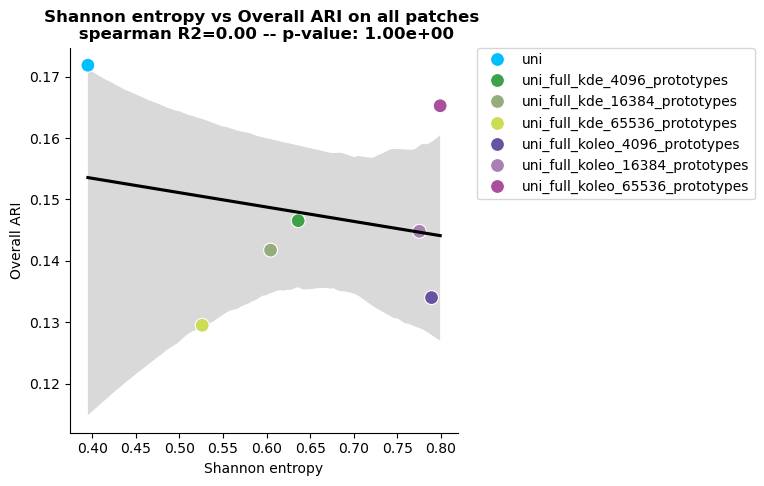

In [172]:
s, p = spearmanr(df_model_summary['shannon_entropy'], df_model_summary['overall_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary, x='shannon_entropy', y='overall_ari', color='black')
sns.scatterplot(data=df_model_summary, x='shannon_entropy', y='overall_ari', hue=df_model_summary.index,
                palette=models_palette, s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('Overall ARI')
plt.title(f'Shannon entropy vs Overall ARI on all patches \n spearman R2={s:.2f} -- p-value: {p:.2e}', weight='bold')
sns.despine()
plt.savefig(os.path.join(config["figures_folder"], f"Figure3/shannon_entropy_vs_overall_ari_{model_type}_models.pdf"), bbox_inches='tight')

In [173]:
umap_clust = benchmark_clustering.get_best_UMAP_ari_overall(annotated_only=True)


Computing best UMAP parameters for model uni...
Loading best UMAP parameters for model uni...
Computing best UMAP parameters for model uni_full_kde_4096_prototypes...
Loading best UMAP parameters for model uni_full_kde_4096_prototypes...
Loading best UMAP parameters for model uni...
Computing best UMAP parameters for model uni_full_kde_4096_prototypes...
Loading best UMAP parameters for model uni_full_kde_4096_prototypes...
Computing best UMAP parameters for model uni_full_kde_16384_prototypes...
Loading best UMAP parameters for model uni_full_kde_16384_prototypes...
Computing best UMAP parameters for model uni_full_kde_65536_prototypes...
Loading best UMAP parameters for model uni_full_kde_65536_prototypes...
Computing best UMAP parameters for model uni_full_koleo_4096_prototypes...
Loading best UMAP parameters for model uni_full_koleo_4096_prototypes...
Computing best UMAP parameters for model uni_full_koleo_16384_prototypes...
Loading best UMAP parameters for model uni_full_koleo_16

In [174]:
ari_overall_annotated = pd.DataFrame(pd.DataFrame(umap_clust).loc["ari"].T)

Text(0.5, 1.0, 'Overall ARI on annotated patches \n UMAP k-means')

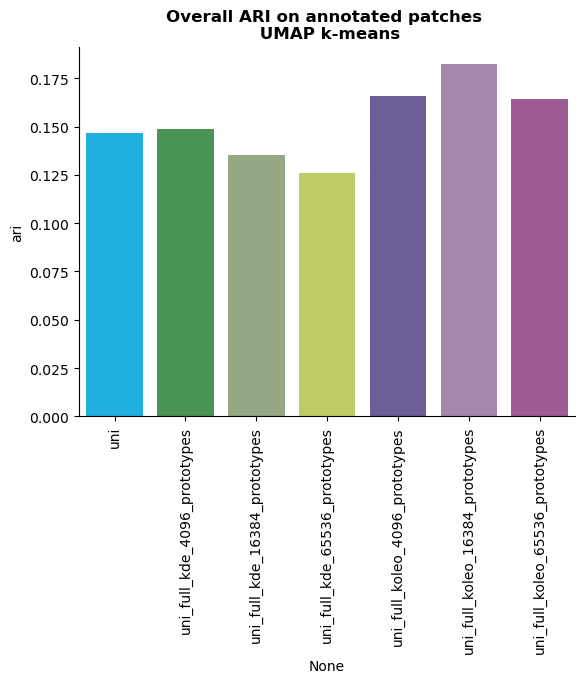

In [175]:
sns.barplot(ari_overall_annotated, x=ari_overall_annotated.index, y='ari', hue=ari_overall_annotated.index,
                palette=models_palette)
sns.despine()
plt.xticks(rotation=90)

plt.title("Overall ARI on annotated patches \n UMAP k-means", weight='bold')